# Bayes Theorem

Consider a situation where we are having two machine and both the machine produes same type of tool. Machine 1 produes tools named as m1 and Machine 2 produces tools named as m2.<br>
Our task is to find what is the probability that machine 2 produces defective tool.<br>
<br>
To solve this problem the concept of Bayes Theorem is used.

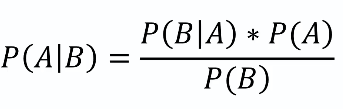

Firstly we note down the information given to us.<br>

P(A|B) means the probability of A given B.

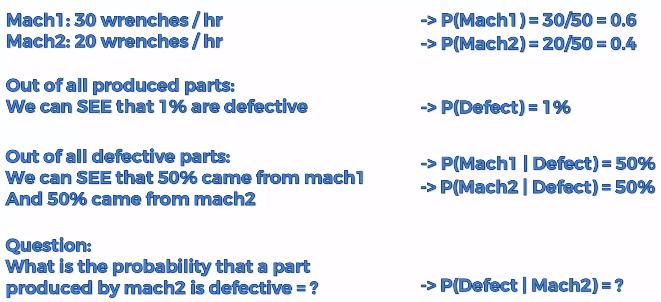

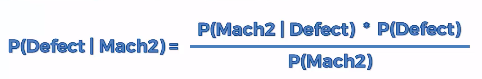

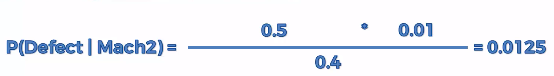

# Naive Bayes Classifier

We have the data of people's salary and age, the data points on the basis of salary and age determines weather the person walks to work or drives to work.<br>
Red-Walk, Green-Drive

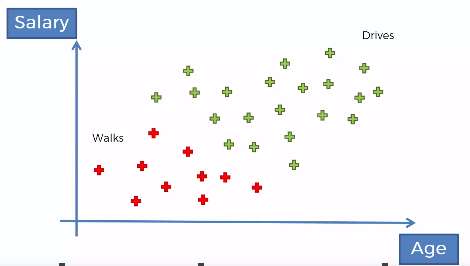

Now what happens when we add a new data points. How do we determine if the person will go by walking or drive to work. So we use Naive Bayes classifier.<br>
We apply Bayes theorem twice.
Firstly for walk and then for drive.
X represents the features i.e. salary and age.


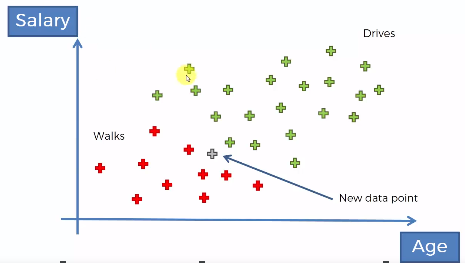

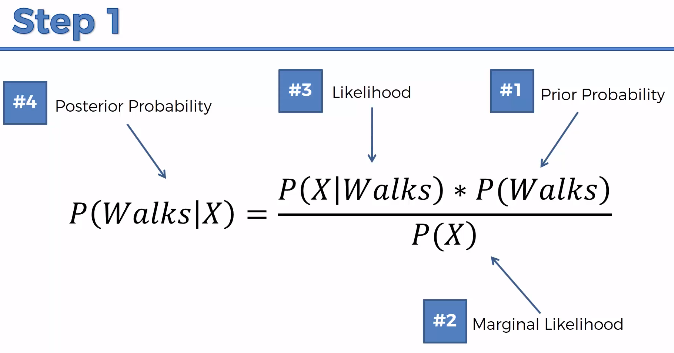

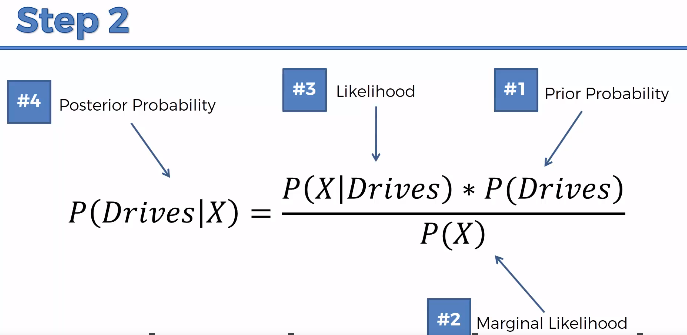

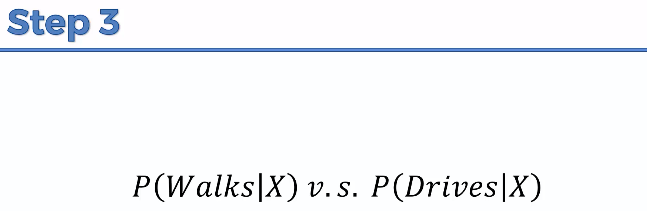

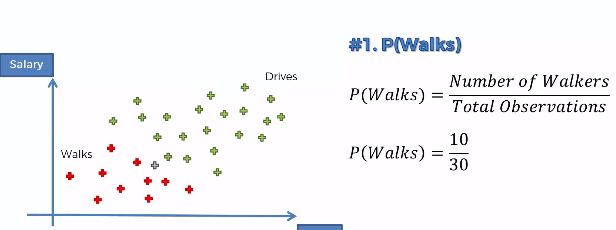

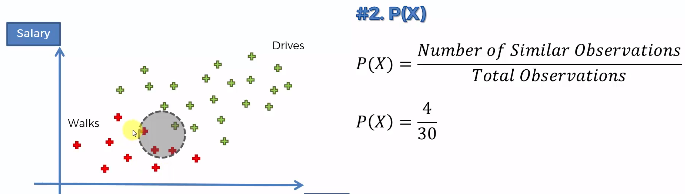

In the above step a circle is drawn around the new data point. (gray data point)

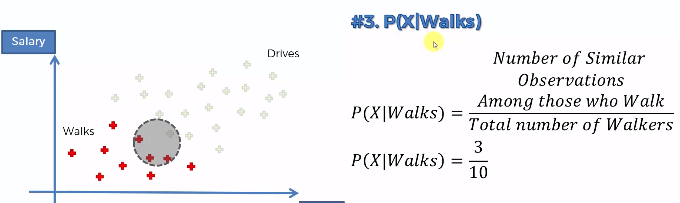

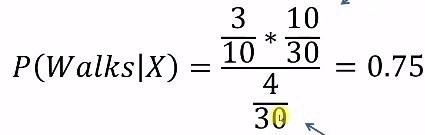

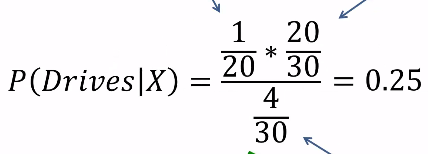

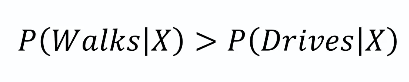

Since the probability of Walk is greater than probability of Drive, so the new data point will be classified under walk category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
cl=GaussianNB()
cl.fit(x_train,y_train)

GaussianNB()

In [11]:
print(cl.predict(sc.transform([[30,87000]])))

[0]


In [13]:
y_pred=cl.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 7 25]]


0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


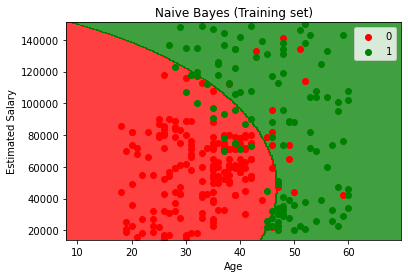

In [15]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, cl.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


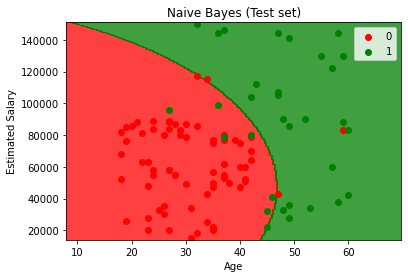

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, cl.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()